In [1]:
import networkx as nx
import json
import matplotlib.pyplot as plt
%matplotlib inline

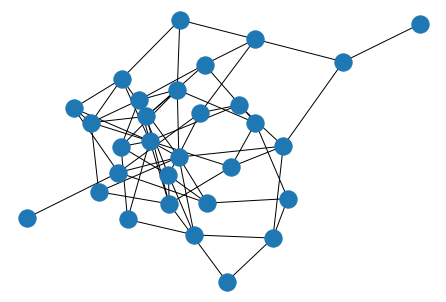

In [2]:
G = nx.erdos_renyi_graph(30,4.0/30)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(30,4.0/30)
plt.figure(figsize=(6,4));
nx.draw(G)

In [14]:
for ix,deg in G.degree():
    G.nodes[ix]['degree'] = deg
    G.nodes[ix]['parity'] = (1-deg%2)

for ix,katz in nx.katz_centrality(G).items():
    G.nodes[ix]['katz'] = katz

G.nodes(data=True)

NodeDataView({0: {'degree': 5, 'parity': 0, 'katz': 0.19772684542176197}, 1: {'degree': 3, 'parity': 0, 'katz': 0.15903434821739898}, 2: {'degree': 6, 'parity': 1, 'katz': 0.20885624009795742}, 3: {'degree': 6, 'parity': 1, 'katz': 0.22011980309559537}, 4: {'degree': 3, 'parity': 0, 'katz': 0.14113536512260424}, 5: {'degree': 6, 'parity': 1, 'katz': 0.21296690712653432}, 6: {'degree': 8, 'parity': 1, 'katz': 0.24910853843485042}, 7: {'degree': 3, 'parity': 0, 'katz': 0.15587774475267743}, 8: {'degree': 4, 'parity': 1, 'katz': 0.17677382017221513}, 9: {'degree': 5, 'parity': 0, 'katz': 0.2039852928897549}, 10: {'degree': 1, 'parity': 0, 'katz': 0.11042248789785626}, 11: {'degree': 4, 'parity': 1, 'katz': 0.15404992576981727}, 12: {'degree': 7, 'parity': 0, 'katz': 0.24279831405352176}, 13: {'degree': 2, 'parity': 1, 'katz': 0.12876022066051981}, 14: {'degree': 4, 'parity': 1, 'katz': 0.1543494226957156}, 15: {'degree': 4, 'parity': 1, 'katz': 0.1702673288224433}, 16: {'degree': 1, 'pari

In [15]:
from networkx.readwrite import json_graph
data = json_graph.node_link_data(G)
with open('graph.json', 'w') as f:
    json.dump(data, f, indent=4)

In [38]:
%%html

<div id="d3-container">< /div>

<style>

.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}

< /style>

In [65]:
%%javascript
// We load the latest version of d3.js from the Web.
require.config({paths: {d3: "https://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {

    // Parameter declaration, the height and width of our viz.
    var width = 500,
        height = 300;

    // Colour scale for node colours.
    var color = d3.scale.category10();

    // We create a force-directed dynamic graph layout.
    // D3 has number of layouts - refer to the documentation.
    var force = d3.layout.force()
        .charge(-120)
        .linkDistance(30)
        .size([width, height]);

    // We select the < div> we created earlier and add an 
    // SVG = Scalable Vector Graphics
    var svg = d3.select("#d3-container").select("svg")
    if (svg.empty()) {
        svg = d3.select("#d3-container").append("svg")
                    .attr("width", width)
                    .attr("height", height);
    }

    
    
// We load the JSON network file.
d3.json("graph.json", function(error, graph) {
    // Within this block, the network has been loaded
    // and stored in the 'graph' object.

    // We load the nodes and links into the force-directed
    // graph and initialise the dynamics.
    force.nodes(graph.nodes)
        .links(graph.links)
        .start();

    // We create a < line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
        .data(graph.links)
        .enter().append("line")
        .attr("class", "link");

    // We create a < circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
        .data(graph.nodes)
        .enter().append("circle")
        .attr("class", "node")
        .attr("r", 5)  // radius
        .style("fill", function(d) {
            // We colour the node depending on the degree.
            return color(d.degree); 
        })
        .call(force.drag)
        .call(drag(simulation));

    // The label each node its node number from the networkx graph.
    node.append("title")
        .text(function(d) { return d.id; });

    // The label each node its node number from the networkx graph.
    node.append("title")
        .text(function(d) { return "Node: " + d.id + "\n" + "Degree: " + d.degree + "\n" + "Katz: " + d.katz;});

    simulation.on("tick", () => {
    link
        .attr("x1", d => d.source.x)
        .attr("y1", d => d.source.y)
        .attr("x2", d => d.target.x)
        .attr("y2", d => d.target.y);

    node
        .attr("cx", d => d.x)
        .attr("cy", d => d.y);
      });

      invalidation.then(() => simulation.stop());
    
    

    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed graph,
    // at each time step.
    force.on("tick", function() {
        link.attr("x1", function(d) { return d.source.x; })
            .attr("y1", function(d) { return d.source.y; })
            .attr("x2", function(d) { return d.target.x; })
            .attr("y2", function(d) { return d.target.y; });

        node.attr("cx", function(d) { return d.x; })
            .attr("cy", function(d) { return d.y; });
            


        });
    });
});



<IPython.core.display.Javascript object>

In [52]:
%%javascript

//Toggle stores whether the highlighting is on
var toggle = 0;

//Create an array logging what is connected to what
var linkedByIndex = {};

for (var i = 0; i < graph.nodes.length; i++) {
    linkedByIndex[i + "," + i] = 1;
};

graph.links.forEach(function (d) {
    linkedByIndex[d.source.index + "," + d.target.index] = 1;
});

//Looks up whether a pair of nodes are neighbours.
function neighboring(a, b) {
    return linkedByIndex[a.index + "," + b.index];
}

function connectedNodes() {
    if (toggle == 0) {
        //Reduce the opacity of all but the neighbouring nodes to 0.3.
        var d = d3.select(this).node().__data__;
        node.style("opacity", function (o) {
            return neighboring(d, o) | neighboring(o, d) ? 1 : 0.3;
        });
        //Reduce the opacity of all but the neighbouring edges to 0.8.
        link.style("opacity", function (o) {
            return d.index==o.source.index | d.index==o.target.index ? 1 : 0.8;
        });
        //Increases the stroke width of the neighbouring edges.
        link.style("stroke-width", function (o) {
            return d.index==o.source.index | d.index==o.target.index ? 3 : 0.8;
        });
        //Reset the toggle.
        toggle = 1;
    } else {
        //Restore everything back to normal
        node.style("opacity", 1);
        link.style("opacity", 1);
        link.style("stroke-width", 1);
        toggle = 0;
    }
}

<IPython.core.display.Javascript object>

In [54]:
%%javascript
chart = {
  const links = data.links.map(d => Object.create(d));
  const nodes = data.nodes.map(d => Object.create(d));

  const simulation = d3.forceSimulation(nodes)
      .force("link", d3.forceLink(links).id(d => d.id))
      .force("charge", d3.forceManyBody())
      .force("center", d3.forceCenter(width / 2, height / 2));

  const svg = d3.create("svg")
      .attr("viewBox", [0, 0, width, height]);

  const link = svg.append("g")
      .attr("stroke", "#999")
      .attr("stroke-opacity", 0.6)
    .selectAll("line")
    .data(links)
    .join("line")
      .attr("stroke-width", d => Math.sqrt(d.value));

  const node = svg.append("g")
      .attr("stroke", "#fff")
      .attr("stroke-width", 1.5)
    .selectAll("circle")
    .data(nodes)
    .join("circle")
      .attr("r", 5)
      .attr("fill", color)
      .call(drag(simulation));

  node.append("title")
      .text(d => d.id);

  simulation.on("tick", () => {
    link
        .attr("x1", d => d.source.x)
        .attr("y1", d => d.source.y)
        .attr("x2", d => d.target.x)
        .attr("y2", d => d.target.y);

    node
        .attr("cx", d => d.x)
        .attr("cy", d => d.y);
  });

  invalidation.then(() => simulation.stop());

  return svg.node();
}

<IPython.core.display.Javascript object>

In [68]:
%%html

<div id="d3-container-2">< /div>

<style>

.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}

< /style>

In [75]:
%%javascript
// We load the latest version of d3.js from the Web.
require.config({paths: {d3: "https://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {

    // Parameter declaration, the height and width of our viz.
    var width = 700,
        height = 300;

    // Colour scale for node colours.
    var color = d3.scale.category10();

    // We create a force-directed dynamic graph layout.
    // D3 has number of layouts - refer to the documentation.
    var force = d3.layout.force()
        .charge(-120)
        .linkDistance(30)
        .size([width, height]);

    // We select the < div> we created earlier and add an 
    // SVG = Scalable Vector Graphics
    var svg = d3.select("#d3-container-2").select("svg")
    if (svg.empty()) {
        svg = d3.select("#d3-container-2").append("svg")
                    .attr("width", width)
                    .attr("height", height);
    }

    
    
// We load the JSON network file.
d3.json("graph.json", function(error, graph) {
    // Within this block, the network has been loaded
    // and stored in the 'graph' object.

    // We load the nodes and links into the force-directed
    // graph and initialise the dynamics.
    force.nodes(graph.nodes)
        .links(graph.links)
        .start();

    // We create a < line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
        .data(graph.links)
        .enter().append("line")
        .attr("class", "link");

    // We create a < circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
        .data(graph.nodes)
        .enter().append("circle")
        .attr("class", "node")
        .attr("r", 5)  // radius
        .style("fill", function(d) {
            // We colour the node depending on the degree.
            return color(d.degree); 
        })
        .call(force.drag)

    // The label each node its node number from the networkx graph.
    node.append("title")
        .text(function(d) { return d.id; });

    // The label each node its node number from the networkx graph.
    node.append("title")
        .text(function(d) { return "Node: " + d.id + "\n" + "Degree: " + d.degree + "\n" + "Katz: " + d.katz;});
    
    

    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed graph,
    // at each time step.
    force.on("tick", function() {
        link.attr("x1", function(d) { return d.source.x; })
            .attr("y1", function(d) { return d.source.y; })
            .attr("x2", function(d) { return d.target.x; })
            .attr("y2", function(d) { return d.target.y; });

        node.attr("cx", function(d) { return d.x; })
            .attr("cy", function(d) { return d.y; });
            


        });
    });
});

<IPython.core.display.Javascript object>